In [1]:
import pandas as pd    # importing librarys
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\rock\dataset\mcdonalds.csv")  #Loading dataset

In [4]:
df    

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
df.isna().sum()   # checking missing value

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
df.duplicated().sum()      # check Duplicates

22

In [7]:
df = df.drop_duplicates()       # drop the duplicates -- less values (22)

In [8]:
df.duplicated().sum()

0

### Step 7: Describing Segments

# Task 

9.1 Developing a Complete Picture of Market Segments

9.2 Using Visualisations to Describe Market Segments

9.2.1 Nominal and Ordinal Descriptor Variables 

9.2.2 Metric Descriptor Variables

9.3 Testing for Segment Differences in Descriptor Variables

9.4 Predicting Segments from Descriptor Variables

9.4.1 Binary Logistic Regression

9.4.2 Multinomial Logistic Regression

9.4.3 Tree-Based Methods

9.5 Step 7 Checklis

In [9]:
# Clean or encode binary Yes/No columns 

In [10]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

In [11]:
# Clean 'Like' to numeric sentiment (e.g., +3 → 3, 'I hate it!-5' → -5)
df['Like'] = df['Like'].str.extract(r'([-+]?\d+)').astype(int)

In [12]:
# Encode categorical columns
df['Gender_Code'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['VisitFrequency_Code'] = df['VisitFrequency'].astype('category').cat.codes

### Assuming Clustering is Done

In [13]:
from sklearn.cluster import KMeans

features_for_clustering = binary_columns + ['Like', 'Age']
X = df[features_for_clustering]

kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(X)

### 9.1 Complete Picture of segements

In [14]:
# Average per segment
print(df.groupby('segment')[features_for_clustering].mean())

            yummy  convenient     spicy  fattening    greasy      fast  \
segment                                                                  
0        0.425139    0.890943  0.142329   0.818854  0.425139  0.913124   
1        0.761682    0.934579  0.053738   0.913551  0.686916  0.913551   
2        0.497835    0.900433  0.077922   0.878788  0.497835  0.867965   

            cheap     tasty  expensive   healthy  disgusting      Like  \
segment                                                                  
0        0.626617  0.563771   0.295749  0.203327    0.240296  0.014787   
1        0.619159  0.782710   0.371495  0.193925    0.210280  1.934579   
2        0.536797  0.603896   0.426407  0.203463    0.281385  0.541126   

               Age  
segment             
0        59.682070  
1        27.212617  
2        43.220779  


In [15]:
print(df['segment'].value_counts())

0    541
2    462
1    428
Name: segment, dtype: int64


### 9.2 Visualizing Segements 

### 9.2.1

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

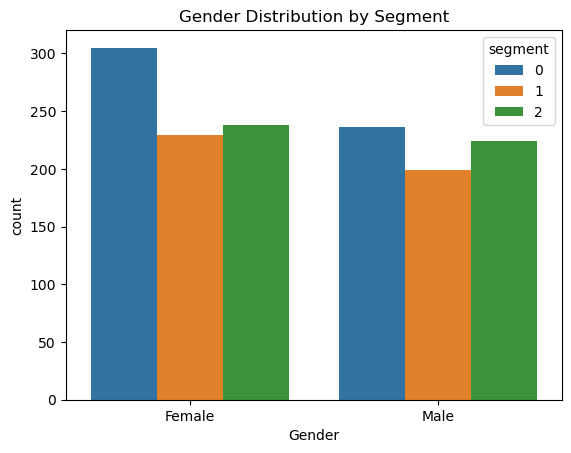

In [17]:
# Gender
sns.countplot(data=df, x='Gender', hue='segment')
plt.title("Gender Distribution by Segment")
plt.show()

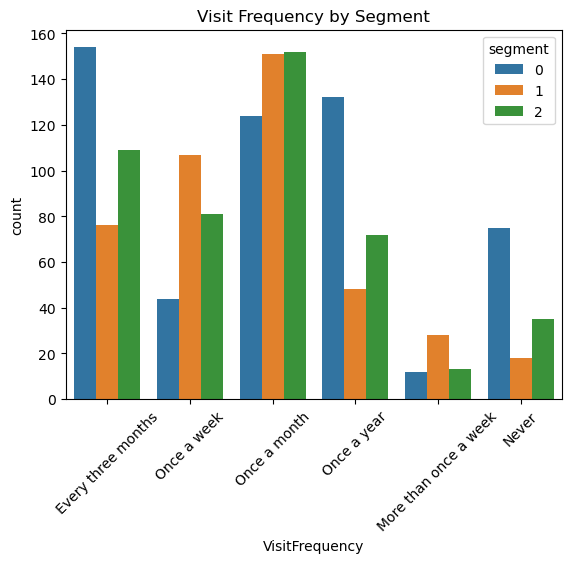

In [18]:
# Visit frequency
sns.countplot(data=df, x='VisitFrequency', hue='segment')
plt.title("Visit Frequency by Segment")
plt.xticks(rotation=45)
plt.show()

### 9.2.2 Metric Variables

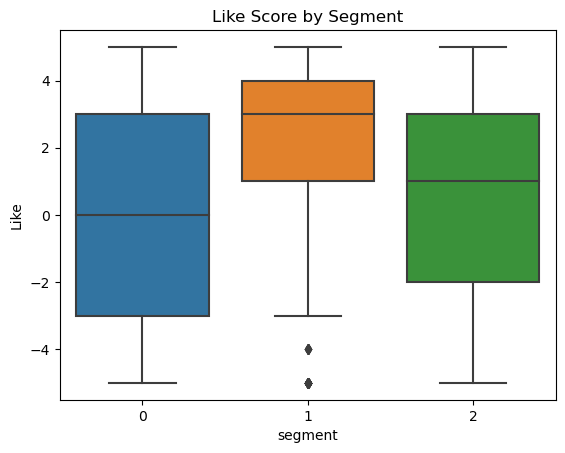

In [19]:
# Like score
sns.boxplot(data=df, x='segment', y='Like')
plt.title("Like Score by Segment")
plt.show()

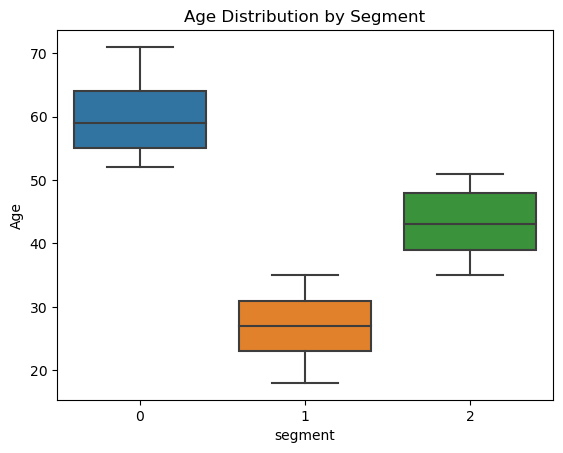

In [20]:
# Age
sns.boxplot(data=df, x='segment', y='Age')
plt.title("Age Distribution by Segment")
plt.show()

### 9.3 Testing Segement Differences

In [21]:
#ANOVA for metric variables

In [22]:
from scipy.stats import f_oneway

In [23]:
for var in ['Like', 'Age']:
    groups = [df[df['segment'] == s][var] for s in df['segment'].unique()]
    stat, p = f_oneway(*groups)
    print(f"{var} ANOVA p-value: {p:.4f}")

Like ANOVA p-value: 0.0000
Age ANOVA p-value: 0.0000


In [24]:
#Chi-Square for categorical variables

In [25]:
from scipy.stats import chi2_contingency

In [26]:
for var in ['Gender', 'VisitFrequency']:
    table = pd.crosstab(df[var], df['segment'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{var} Chi-square p-value: {p:.4f}")

Gender Chi-square p-value: 0.2983
VisitFrequency Chi-square p-value: 0.0000


### 9.4 Predicting Segments

### 9.4.2 Multinomial Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
X = df[['Like', 'Age', 'Gender_Code', 'VisitFrequency_Code']]
y = df['segment']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
model = LogisticRegression(multi_class='multinomial', max_iter=500)
model.fit(X_train, y_train)
print("Multinomial Logistic Regression Accuracy:", model.score(X_test, y_test))

Multinomial Logistic Regression Accuracy: 0.9976744186046511


In [35]:
## Multinomial Logistic Regression Accuracy: 0.9976744186046511  - Good Accuracy 

### 9.4.3 Tree-Based Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [32]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       122

    accuracy                           1.00       430
   macro avg       1.00      1.00      1.00       430
weighted avg       1.00      1.00      1.00       430



### 9.5 Step 7 Checklist

In [33]:
print("Segment profiling, visualization, testing, and prediction completed.")


Segment profiling, visualization, testing, and prediction completed.
